# Web Content Extraction using Machine Learning

In [36]:
import requests
from bs4 import BeautifulSoup
import pandas as pd
import heapq
import pylcs as LCS

from collections import Counter

import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import f1_score,confusion_matrix

from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
import matplotlib.pyplot as plt

import seaborn as sns

## Data Retrieval

In [37]:
URL = "https://www.ndtv.com/india-news/ndtv-news-on-oxygen-supply-cited-by-delhi-high-court-2418022"
page = requests.get(URL)
soup = BeautifulSoup(page.content, 'html5lib')
print(page.content[0:1000])

b'<!doctype html><html xmlns="http://www.w3.org/1999/xhtml" itemscope itemtype="http://schema.org/NewsArticle"><head><title>At Delhi Oxygen Hearing, &quot;Brother Judge&quot; Sends NDTV News On WhatsApp</title><meta name="news_keywords" content="Coronavirus,Delhi High Court,NDTV" itemprop="keywords"/><meta name="description" content="The full horror of an oxygen shortage in Delhi&#039;s Covid spiral sank in before the High Court today when NDTV&#039;s reports on top hospitals running out of oxygen were flagged by one of the judges." itemprop="description"/><meta name="section" content="india" itemprop="articleSection"/><meta name="url" content="https://www.ndtv.com/india-news/ndtv-news-on-oxygen-supply-cited-by-delhi-high-court-2418022" itemprop="url"/><link href="https://www.ndtv.com/india-news/ndtv-news-on-oxygen-supply-cited-by-delhi-high-court-2418022?amp=1&akamai-rum=off" rel="amphtml" ><link href="https://plus.google.com/+NDTV" rel="publisher" ><link href="android-app://com.july.

## Extracting the Meta Content

In [38]:
meta = []
for tag in soup.findAll(True):
    if tag.name == "meta":
        meta.append(tag.attrs)

metaContent = []
for dic in meta:
    metaContent.append(dic["content"])

metaContent = []
for dic in meta:
    metaContent.append(dic["content"])

### Removing Noises in the Meta Content

In [39]:
noise = ["https", ".com", "com.", "www", "@", ":", "=", "#"]
metaContentFinal = []
for content in metaContent:
    if any(i in content for i in noise):
        pass
    else:
        metaContentFinal.append(content)

metaContentStr = ""

for content in metaContentFinal:
    metaContentStr = metaContentStr + content

In [40]:
print(metaContentStr)

Coronavirus,Delhi High Court,NDTVThe full horror of an oxygen shortage in Delhi's Covid spiral sank in before the High Court today when NDTV's reports on top hospitals running out of oxygen were flagged by one of the judges.indiaCoronavirus,Delhi High Court,NDTVAt Delhi Oxygen Hearing, "Brother Judge" Sends NDTV News On WhatsApparticle630473The full horror of an oxygen shortage in Delhi's Covid spiral sank in before the High Court today when NDTV's reports on top hospitals running out of oxygen were flagged by one of the judges.213741912058651NDTV377869410NDTV390847563NDTV HDsummary_large_imageAt Delhi Oxygen Hearing, "Brother Judge" Sends NDTV News On WhatsAppThe full horror of an oxygen shortage in Delhi's Covid spiral sank in before the High Court today when NDTV's reports on top hospitals running out of oxygen were flagged by one of the judges.newsAt Delhi Oxygen Hearing, "Brother Judge" Sends NDTV News On WhatsAppNDTV377869410NDTV HDNDTV10030NDTV123At Delhi Oxygen Hearing, "Brothe

## Feature Extraction

### Tags, Texts, Attributes Extraction

In [41]:
tags = []
texts = []
attrs = []

for tag in soup.findAll(True):
    if (tag.name == "style") or (tag.name == "script") or (tag.name == "body") or (tag.name == "div") or (tag.name == "html") or (tag.name == "head"):
        continue
    else:
        tags.append(tag.name)
        texts.append(tag.text)
        attrs.append(tag.attrs)

In [42]:
tags[0:10]

['title',
 'meta',
 'meta',
 'meta',
 'meta',
 'link',
 'link',
 'link',
 'link',
 'link']

In [43]:
tagsCount = Counter(tags)
uniqueTags = list(tagsCount.keys())
countValues = list(tagsCount.values())

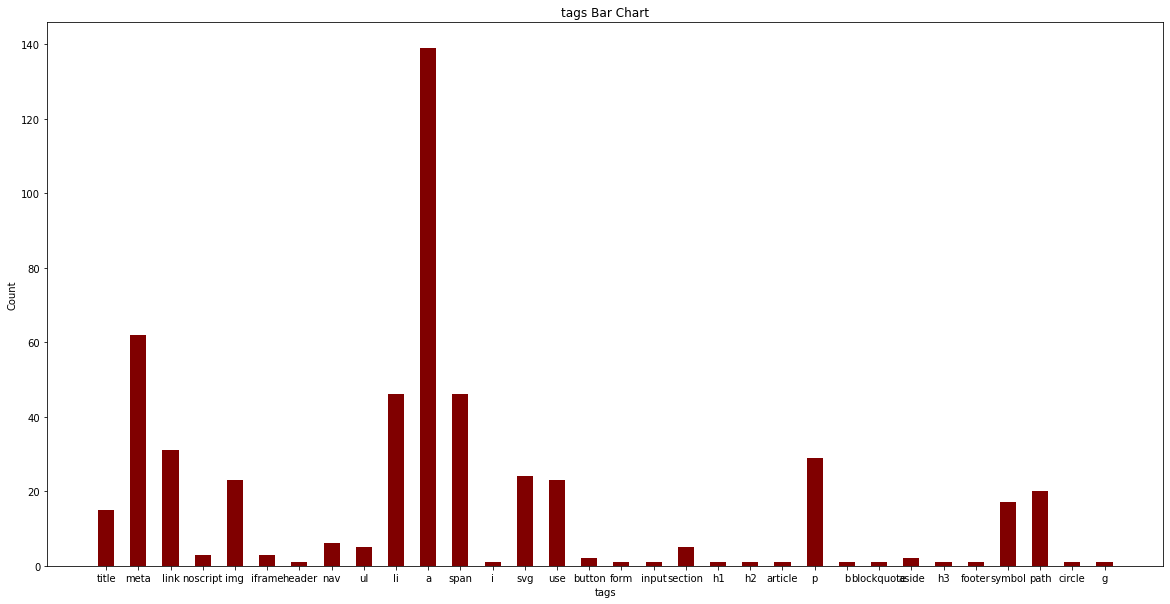

In [44]:
fig = plt.figure(figsize = (20, 10))
plt.bar(uniqueTags, countValues, color ='maroon',width = 0.5)
plt.xlabel("tags")
plt.ylabel("Count")
plt.title("tags Bar Chart")
plt.show()

In [45]:
texts[0:5]

['At Delhi Oxygen Hearing, "Brother Judge" Sends NDTV News On WhatsApp',
 '',
 '',
 '',
 '']

In [46]:
attrs[0:5]

[{},
 {'name': 'news_keywords',
  'content': 'Coronavirus,Delhi High Court,NDTV',
  'itemprop': 'keywords'},
 {'name': 'description',
  'content': "The full horror of an oxygen shortage in Delhi's Covid spiral sank in before the High Court today when NDTV's reports on top hospitals running out of oxygen were flagged by one of the judges.",
  'itemprop': 'description'},
 {'name': 'section', 'content': 'india', 'itemprop': 'articleSection'},
 {'name': 'url',
  'content': 'https://www.ndtv.com/india-news/ndtv-news-on-oxygen-supply-cited-by-delhi-high-court-2418022',
  'itemprop': 'url'}]

### Feature selection

In [47]:
texts = pd.Series(texts)
column = list(set(tags))

data = []

for i in range(0, len(tags)):
    data1 = []
    for j in range(0, len(column)):
        if tags[i] == column[j]:
            data1.append(1)
        else:
            data1.append(0)
    data.append(data1)

df = pd.DataFrame(columns=column, data=data)

In [48]:
df.head()

,i,link,path,use,nav,h2,noscript,li,title,h1,...,ul,h3,meta,span,button,a,section,symbol,footer,img
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0


### Text Length as Feature

In [76]:
textSize = []

for text in texts:
    textSize.append(len(text))

df["textSize"] = textSize

In [77]:
df.head()

,sc-btn,s-ls_li,cmt-dn,hid_sml-dvc,mr-60,m-nv_li,brd-nv_li,foot-news--list,ss-lk,item-title,...,header,twitter-tweet,facebook,comment,col-lf-2,m-nv_lgo,twitter,input-search,col-200,textSize
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,68
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### HTML Tags Attribute as Feature

In [50]:
attrsColumn = []
for i in attrs:
    attrsColumn.append(list(i.keys()))

attrsColumn = sum(attrsColumn, [])

attrsColumn = list(set(attrsColumn))

data = []
for i in attrs:
    idx = []
    for j in i.keys():
        for k in range(0, len(attrsColumn)):
            if j == attrsColumn[k]:
                idx.append(k)

    data.append([1 if i in idx else 0 for i in range(0, len(attrsColumn))])

df1 = pd.DataFrame(columns=attrsColumn, data=data)

finalDf1 = pd.concat([df, df1], axis=1, join='inner')

In [51]:
finalDf1.head()

,i,link,path,use,nav,h2,noscript,li,title,h1,...,data-id,data-tb-shadow-region-image,method,fill,xmlns,border,cy,lang,itemprop,src
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### JavaScript Keywords as Feature

In [53]:
keywords = ["await", "break", "case", "catch", "class", "const", "continue", "debugger",
            "default", "delete", "do", "else", "enum", "export", "extends", "false",
            "finally", "for", "function", "if", "implements", "import", "in", "instanceof", "interface",
            "let", "new", "null", "package", "private", "protected", "public", "return", "super", "switch",
            "static", "throw", "try", "true", "typeof", "var", "void", "while", "with", "yield",
            "(", ")", "{", "}", "]", "[", ";", ".", "\"", "function", "console", "cmd", "display", "push",
            "window", "href", "\'", "return"]


data=[]
for i in str(texts):
    data1=[]
    for j in keywords:
        c = i.count(j)
        data1.append(c)
    data.append(data1)


df1 = pd.DataFrame(columns=keywords, data=data)
finalDf2 = pd.concat([finalDf1, df1], axis=1, join='inner')

In [54]:
finalDf2.head()

,i,link,path,use,nav,h2,noscript,li,title,h1,...,"""",function,console,cmd,display,push,window,href,',return
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### HTML tags CSS Class as attribute

In [56]:
tagsClass = []

for attr in attrs:
    tagsClass.append(attr.get("class"))

classList = []
for i in tagsClass:
    if i:
        for j in i:
            classList.append(j)

uniqueClass = list(set(classList))

data = []
zeroes = [0 for i in range(len(uniqueClass))]
for iClass in tagsClass:
    row=[]
    if iClass:
        for j in uniqueClass:
            if j in iClass:
                row.append(1)
            else:
                row.append(0)
        data.append(row)
    else:
        data.append(zeroes)


df = pd.DataFrame(columns=uniqueClass,data=data)

finalDf3 = pd.concat([finalDf2, df], axis=1, join='inner')

In [57]:
finalDf3.head()

,i,link,path,use,nav,h2,noscript,li,title,h1,...,numb,header,twitter-tweet,facebook,comment,col-lf-2,m-nv_lgo,twitter,input-search,col-200
0,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Normalization

In [58]:
std = StandardScaler()

finalDf3 = std.fit_transform(finalDf3)

finalDf3 = pd.DataFrame(finalDf3)

In [59]:
finalDf3.head()

,0,1,2,3,4,5,6,7,8,9,...,221,222,223,224,225,226,227,228,229,230
0,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,5.767726,-0.044151,...,-0.0625,-0.044151,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151
1,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.0625,-0.044151,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151
2,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.0625,-0.044151,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151
3,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.0625,-0.044151,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151
4,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.0625,-0.044151,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151


## DBSCAN Clustering

In [60]:
clustering = DBSCAN().fit(finalDf3)

uniqueClusters = set(clustering.labels_)

finalDf3["cluster"] =[i+1 for i in clustering.labels_]

print(finalDf3.head())

          0         1         2         3         4         5         6  \
0 -0.044151 -0.253342 -0.201211 -0.216433 -0.108679 -0.044151 -0.076621   
1 -0.044151 -0.253342 -0.201211 -0.216433 -0.108679 -0.044151 -0.076621   
2 -0.044151 -0.253342 -0.201211 -0.216433 -0.108679 -0.044151 -0.076621   
3 -0.044151 -0.253342 -0.201211 -0.216433 -0.108679 -0.044151 -0.076621   
4 -0.044151 -0.253342 -0.201211 -0.216433 -0.108679 -0.044151 -0.076621   

          7         8         9  ...       222       223       224     225  \
0 -0.313513  5.767726 -0.044151  ... -0.044151 -0.044151 -0.076621 -0.0625   
1 -0.313513 -0.173379 -0.044151  ... -0.044151 -0.044151 -0.076621 -0.0625   
2 -0.313513 -0.173379 -0.044151  ... -0.044151 -0.044151 -0.076621 -0.0625   
3 -0.313513 -0.173379 -0.044151  ... -0.044151 -0.044151 -0.076621 -0.0625   
4 -0.313513 -0.173379 -0.044151  ... -0.044151 -0.044151 -0.076621 -0.0625   

        226       227       228       229       230  cluster  
0 -0.044151 -0.07

## Relavance Score for Each Cluster

In [61]:
score = [0 for i in range(len(uniqueClusters))]

for i in range(0, finalDf3.shape[0]):
    score[int(finalDf3.loc[i]["cluster"])] = score[int(finalDf3.loc[i]["cluster"])] + LCS.lcs(metaContentStr,texts[i])

### Cluster with Highest Score

In [62]:
print("Score of Each Cluster")
print(score)

print()
print("Clusters with high Score")

maxScoreClusters = heapq.nlargest(2, range(len(score)), key=score.__getitem__)
print(maxScoreClusters)

Score of Each Cluster
[5716, 160, 0, 0, 0, 0, 0, 90, 73, 62, 0, 45, 45, 0, 0, 1000, 111, 2997, 169, 0, 261, 353, 578, 0, 0, 107, 107, 92, 0, 0]

Clusters with high Score
[0, 17]


## Label Marking

In [63]:
label = []

for i in range(0,finalDf3.shape[0]):
    if (int(finalDf3.loc[i]["cluster"]) == maxScoreClusters[0]) or (int(finalDf3.loc[i]["cluster"]) == maxScoreClusters[1]):
        label.append(1)
    else:
        label.append(0)
finalDf3["label"] = label

In [64]:
finalDf3.head()

,0,1,2,3,4,5,6,7,8,9,...,223,224,225,226,227,228,229,230,cluster,label
0,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,5.767726,-0.044151,...,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151,1,0
1,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151,2,0
2,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151,2,0
3,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151,2,0
4,-0.044151,-0.253342,-0.201211,-0.216433,-0.108679,-0.044151,-0.076621,-0.313513,-0.173379,-0.044151,...,-0.044151,-0.076621,-0.0625,-0.044151,-0.076621,-0.099112,-0.044151,-0.044151,2,0


## SVM Classification

### Data Pre-Processing

In [65]:
X_clusters = finalDf3["cluster"]
finalDf3 = finalDf3.drop(columns="cluster")

X = finalDf3.drop(columns="label")
y = finalDf3["label"]

In [74]:
print(X.shape)
print(y.shape)

(514, 231)
(514,)


### Train and Test Data Split

In [67]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

### Training the Model

In [68]:
svmModel = SVC()
svmModel.fit(X_train,y_train)

SVC()

### Prediction

In [69]:
prediction = svmModel.predict(X_test)

### Performance

In [70]:
print("F1 Score of SVM Model")
f1Score = f1_score(y_test,prediction)
print(f1Score)

F1 Score of SVM Model
0.9292929292929293


### Confusion Matrix

In [72]:
print("Confusion Matrix")
cf_matrix = confusion_matrix(y_test,prediction)
print(cf_matrix)

Confusion Matrix
[[117   0]
 [  7  46]]


<AxesSubplot:>

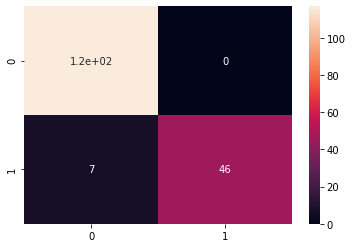

In [73]:
sns.heatmap(cf_matrix, annot=True)